# Ri-Bro-somes

**Data-Based Question:** What genes/traits help predict whether a person will develop Viral Shedding and/or become symptomatic early on. Specifically for the H1N1 disease.

**Studies Analyzed**
- DEE3 H1N1

**Insights so far:** TBA 


## Goals

- Finish Project


### Heatmap Analysis

The code below is fairly simple, but it's easy to change and I think we can use it for some initial insights. It generates a heatmap that compares Gene expressions across a specified range genes to a specified range of timehours. Keep in mind that the heatmap is only related to one subject, but by changing the `SUBJECT_TO_ANALYZE` variable, you can analyze different patients. Be sure to only choose ID's from the `PIDS` subset, for those are the patients that participate in the *DEE3 H1N1* study.

[1] 3004 3003 3005 3001 3002 3009 3007 3006 3008 3010 3014 3011 3012 3018 3017
[16] 3016 3020 3019 3024 3021 3023 3022 3015 3013
125 Levels: 1 10 11 12 13 14 15 16 17 18 19 2 20 3 3001 3002 3003 3004 ... RSV020

,STUDYID,SUBJECTID,AGE,GENDER,EARLYTX,SHAM,SHEDDING_SC1,SYMPTOMATIC_SC2,LOGSYMPTSCORE_SC3,TIMEHOURS,SAMPLEID,CEL
771,DEE3 H1N1,3005,32,Female,NA,NA,0,1,0.845098,-24.0,du09-06s07628,2011_92926_H133A2_22883_DU09-06S07628.CEL
791,DEE3 H1N1,3005,32,Female,NA,NA,0,1,0.845098,0.0,DU09-06S06256,2011_92937_H133A2_22884_DU09-06S06256.CEL
818,DEE3 H1N1,3005,32,Female,NA,NA,0,1,0.845098,5.0,DU09-06S06678,2011_92946_H133A2_22885_DU09-06S06678.CEL
838,DEE3 H1N1,3005,32,Female,NA,NA,0,1,0.845098,12.0,DU09-06S06855,2011_92938_H133A2_22886_DU09-06S06855.CEL
862,DEE3 H1N1,3005,32,Female,NA,NA,0,1,0.845098,21.5,DU09-06S07004,2011_92962_H133A2_22887_DU09-06S07004.CEL
890,DEE3 H1N1,3005,32,Female,NA,NA,0,1,0.845098,29.0,DU09-06S07428,2011_92956_H133A2_22888_DU09-06S07428.CEL
910,DEE3 H1N1,3005,32,Female,NA,NA,0,1,0.845098,36.0,DU09-06S13443,2011_92954_H133A2_22889_DU09-06S13443.CEL
935,DEE3 H1N1,3005,32,Female,NA,NA,0,1,0.845098,45.5,DU09-06S13955,2011_92951_H133A2_22890_DU09-06S13955.CEL
958,DEE3 H1N1,3005,32,Female,NA,NA,0,1,0.845098,53.0,DU09-06S13209,2011_92996_H133A2_22891_DU09-06S13209.CEL
982,DEE3 H1N1,3005,32,Female,NA,NA,0,1,0.845098,60.0,DU09-06S13164,2011_92958_H133A2_22892_DU09-06S13164.CEL


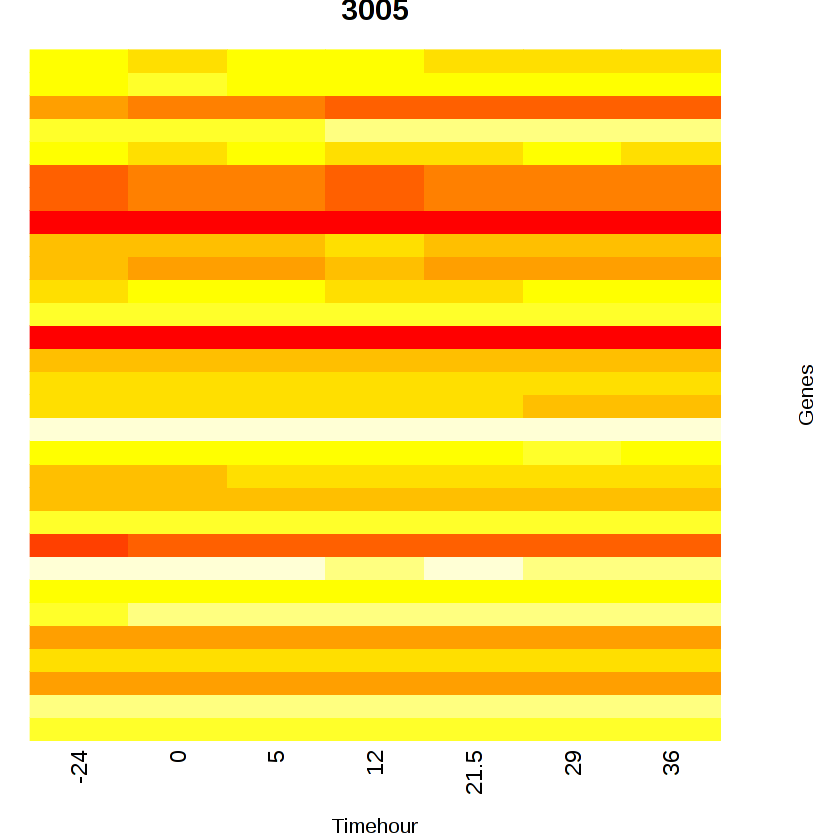

In [83]:
# geneData contains patients and genes, corresponds with patientData which contains more qualitative info
geneData <- read.table ("RMA368_allCol.txt", sep="\t", header=T)
patientData <- read.table ("ViralChallenge_training_CLINICAL.tsv", sep="\t", header=T)

#indexes of DEE3 H1N1 study participants | 474 in length
INDEX <- which(as.character(patientData[,"STUDYID"]) == "DEE3 H1N1")
#unique IDs of patients that participated in DEE3 H1N1 study | 24 in length
PIDS <- unique(patientData[ind, "SUBJECTID"])

#Display ID's to choose from
PIDS

#CHANGE THIS TO ANALYZE A DIFFERENT SUBJECT
SUBJECT_TO_ANALYZE <- 3005
#CHANGE THIS TO ANALAYZE A DIFFERENT RANGE OF GENES i.e. 1:20 TO ANALYZE GENES 1 THROUGH 20
GENES_TO_ANALYZE <- 1:30
#CHANGE THIS TO ANALYZE GENES ACROSS A DIFFERENT RANGE OF TIMEHOURS
TIMEHOURS_TO_ANALYZE <- 1:7


#Grab subject 3004 indexes for all timepoints
subject_indexes <- which(patientData[,"SUBJECTID"] == SUBJECT_TO_ANALYZE)
#Grab gene columns for subject 3004
subject_geneData <- geneData[,subject_indexes]
#Timehours for subject 3004
subject_timeHours <- patientData[subject_indexes,"TIMEHOURS"]

patientData[subject_indexes,]

#Set geneData to correspond to timeHours
names(subject_geneData) <- c(subject_timeHours)

#convert to matrix and draw heatmap from data
geneVsTimehour_matrix <- data.matrix(subject_geneData)
geneVsTimehour_heatmap <- heatmap(geneVsTimehour_matrix[GENES_TO_ANALYZE, TIMEHOURS_TO_ANALYZE], Rowv=NA, Colv=NA, 
                                  xlab = "Timehour", ylab = "Genes", scale = "column", labRow = "", 
                                  main = as.character(SUBJECT_TO_ANALYZE))